## Solutions

### Exercise 1

Here is one solution

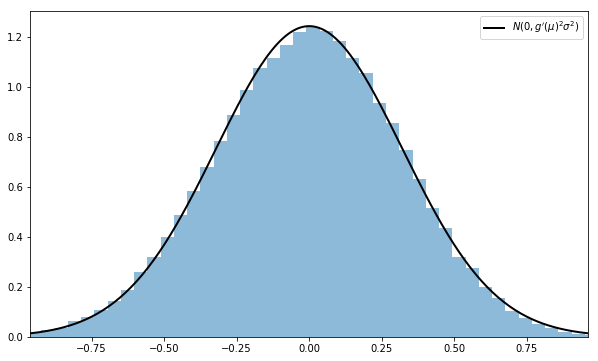

In [7]:
"""
Illustrates the delta method, a consequence of the central limit theorem.
"""

from scipy.stats import uniform


# == Set parameters == #
n = 250
replications = 100000
distribution = uniform(loc=0, scale=(np.pi / 2))
μ, s = distribution.mean(), distribution.std()

g = np.sin
g_prime = np.cos

# == Generate obs of sqrt{n} (g(X_n) - g(μ)) == #
data = distribution.rvs((replications, n))
sample_means = data.mean(axis=1)  # Compute mean of each row
error_obs = np.sqrt(n) * (g(sample_means) - g(μ))

# == Plot == #
asymptotic_sd = g_prime(μ) * s
fig, ax = plt.subplots(figsize=(10, 6))
xmin = -3 * g_prime(μ) * s
xmax = -xmin
ax.set_xlim(xmin, xmax)
ax.hist(error_obs, bins=60, alpha=0.5, density=True)
xgrid = np.linspace(xmin, xmax, 200)
lb = "$N(0, g'(\mu)^2  \sigma^2)$"
ax.plot(xgrid, norm.pdf(xgrid, scale=asymptotic_sd), 'k-', lw=2, label=lb)
ax.legend()
plt.show()

What happens when you replace $ [0, \pi / 2] $ with
$ [0, \pi] $?

In this case, the mean $ \mu $ of this distribution is
$ \pi/2 $, and since $ g' = \cos $, we have $ g'(\mu) = 0 $

Hence the conditions of the delta theorem are not satisfied

### Exercise 2

First we want to verify the claim that

$$
\sqrt{n} \mathbf Q ( \bar{\mathbf X}_n - \boldsymbol \mu )
\stackrel{d}{\to}
N(\mathbf 0, \mathbf I)
$$

This is straightforward given the facts presented in the exercise

Let

$$
\mathbf Y_n := \sqrt{n} ( \bar{\mathbf X}_n - \boldsymbol \mu )
\quad \text{and} \quad
\mathbf Y \sim N(\mathbf 0, \Sigma)
$$

By the multivariate CLT and the continuous mapping theorem, we have

$$
\mathbf Q \mathbf Y_n
\stackrel{d}{\to}
\mathbf Q \mathbf Y
$$

Since linear combinations of normal random variables are normal, the
vector $ \mathbf Q \mathbf Y $ is also normal

Its mean is clearly $ \mathbf 0 $, and its variance covariance
matrix is

$$
\mathrm{Var}[\mathbf Q \mathbf Y]
= \mathbf Q \mathrm{Var}[\mathbf Y] \mathbf Q'
= \mathbf Q \Sigma \mathbf Q'
= \mathbf I
$$

In conclusion,
$ \mathbf Q \mathbf Y_n \stackrel{d}{\to} \mathbf Q \mathbf Y \sim N(\mathbf 0, \mathbf I) $,
which is what we aimed to show

Now we turn to the simulation exercise

Our solution is as follows

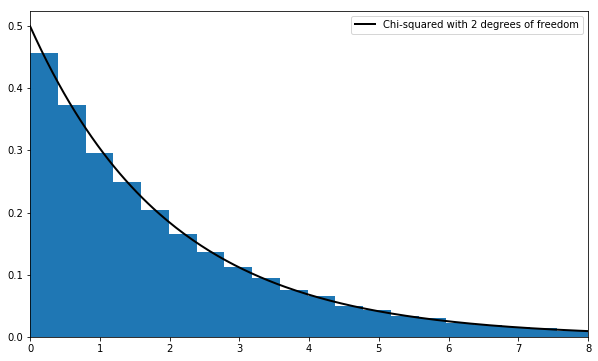

In [8]:
from scipy.stats import chi2
from scipy.linalg import inv, sqrtm

# == Set parameters == #
n = 250
replications = 50000
dw = uniform(loc=-1, scale=2)  # Uniform(-1, 1)
du = uniform(loc=-2, scale=4)  # Uniform(-2, 2)
sw, su = dw.std(), du.std()
vw, vu = sw**2, su**2
Σ = ((vw, vw), (vw, vw + vu))
Σ = np.array(Σ)

# == Compute Σ^{-1/2} == #
Q = inv(sqrtm(Σ))

# == Generate observations of the normalized sample mean == #
error_obs = np.empty((2, replications))
for i in range(replications):
    # == Generate one sequence of bivariate shocks == #
    X = np.empty((2, n))
    W = dw.rvs(n)
    U = du.rvs(n)
    # == Construct the n observations of the random vector == #
    X[0, :] = W
    X[1, :] = W + U
    # == Construct the i-th observation of Y_n == #
    error_obs[:, i] = np.sqrt(n) * X.mean(axis=1)

# == Premultiply by Q and then take the squared norm == #
temp = Q @ error_obs
chisq_obs = np.sum(temp**2, axis=0)

# == Plot == #
fig, ax = plt.subplots(figsize=(10, 6))
xmax = 8
ax.set_xlim(0, xmax)
xgrid = np.linspace(0, xmax, 200)
lb = "Chi-squared with 2 degrees of freedom"
ax.plot(xgrid, chi2.pdf(xgrid, 2), 'k-', lw=2, label=lb)
ax.legend()
ax.hist(chisq_obs, bins=50, density=True)
plt.show()